# Qunatum optimal control example 2

This is an example code for qunatum optimal of two control parameters. you can choose any Hamiltonian you want with two control parameters. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qoct2ctrl import QH, QOCT
%matplotlib inline

Start with some initial conditions of Hamiltonian matrix and an initial control parameter.

In [3]:
H0 = np.matrix([[0,1],[1,0]])
Hctr = [[1,0],[0,-1]]
Hctr2 = [[1,0],[0,-1]]
ctrl = 1.*np.ones(1000)
ctrl2 = 0.*np.ones(1000)

norm = lambda x: np.sqrt(sum(np.array(x)**2)) 
phi_i = [[1],[np.sqrt(2)-1]]
phi_i = phi_i / norm(phi_i)

Call QH module to build up equation of motion and states.

In [4]:
qh_test = QH(H0, Hctr, ctrl, Hctr2, ctrl2, phi_i)
time = qh_test.real_tim
phi = qh_test.phi_t()

Here we can show our first figure of probability variation in time.

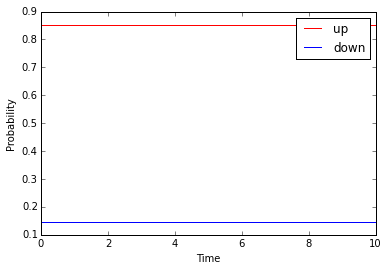

In [5]:
prob = qh_test.prob_t(phi)
plt.plot(time, prob[:,0,:],'r',label = 'up')
plt.plot(time, prob[:,1,:],'b',label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

You can find the probability will stay at original state since I choose eigenstate to begin, and with a small variation cause by ctrl_i. 

Given the goal state we want and previous qh_test class into QOCT module to calculate optimal control pulse.

IterTime: 1,   Error: [[ 1.]],   TotTime: 1.681127,   AvgTime: 1.681132
IterTime: 2,   Error: [[ 0.87176801]],   TotTime: 3.461271,   AvgTime: 1.730638
IterTime: 3,   Error: [[ 0.79034801]],   TotTime: 5.171523,   AvgTime: 1.723842
IterTime: 4,   Error: [[ 0.70921526]],   TotTime: 6.894623,   AvgTime: 1.72365675
IterTime: 5,   Error: [[ 0.63022755]],   TotTime: 8.655881,   AvgTime: 1.731177
IterTime: 6,   Error: [[ 0.55467969]],   TotTime: 10.389122,   AvgTime: 1.731521
IterTime: 7,   Error: [[ 0.48367464]],   TotTime: 12.113038,   AvgTime: 1.73043457143
IterTime: 8,   Error: [[ 0.41811936]],   TotTime: 13.889526,   AvgTime: 1.7361915
IterTime: 9,   Error: [[ 0.35866567]],   TotTime: 15.617463,   AvgTime: 1.73527411111
IterTime: 10,   Error: [[ 0.30566619]],   TotTime: 17.356912,   AvgTime: 1.7356916
IterTime: 11,   Error: [[ 0.25916842]],   TotTime: 19.089738,   AvgTime: 1.73543109091
IterTime: 12,   Error: [[ 0.21894841]],   TotTime: 20.882749,   AvgTime: 1.74022941667
IterTime: 13, 

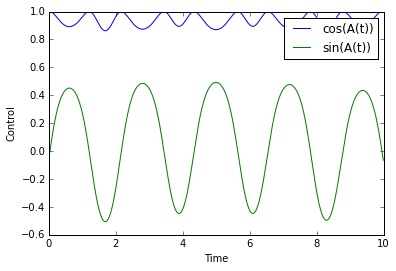

In [6]:
phi_g = [[np.sqrt(2)-1],[-1]]
phi_g = phi_g / norm(phi_g)
qh_test.ctrl = .9*np.ones(1000)
qh_test.ctrl2 = .1*np.ones(1000)
qoct_test = QOCT(qh_test, phi_g)
ctrl_test, ctrl2_test = qoct_test.run()
plt.plot(time[:-1], ctrl_test,label = 'cos(A(t))')
plt.plot(time[:-1], ctrl2_test, label = 'sin(A(t))')
plt.xlabel('Time')
plt.ylabel('Control')
plt.legend()
plt.show()

and probability variation in time.

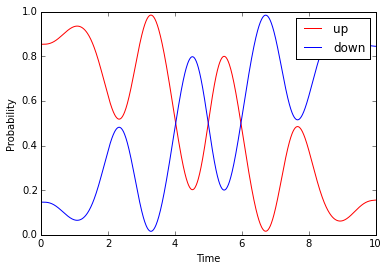

In [7]:
phi_new = qh_test.phi_t()
prob_new = qh_test.prob_t(phi_new)

plt.plot(time, prob_new[:,0,:],'r',label = 'up')
plt.plot(time, prob_new[:,1,:],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

Following we consider a long time variation of probability and control comes in the middle time.

In [10]:
lon = np.size(ctrl_test)
ctrl_lon = np.ones(3*lon)
ctrl_lon[lon:2*lon ] = ctrl_test[:]
ctrl2_lon = np.zeros(3*lon)
ctrl2_lon[lon:2*lon ] = ctrl2_test[:]

One can plot the probability variation again.

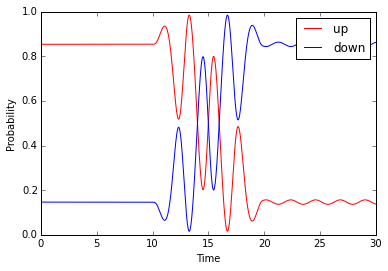

In [11]:
qh_test2 = QH(H0, Hctr, ctrl_lon, Hctr2, ctrl2_lon, phi_i)
time2 = qh_test2.real_tim
phi2 = qh_test2.phi_t()

prob2 = qh_test2.prob_t(phi2)
plt.plot(time2, prob2[:,0,:],'r',label = 'up')
plt.plot(time2, prob2[:,1,:],'b', label = 'down')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

The end.